#Spanish Wine Quality Classification Problem

Importing the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Seep 2025/wines_SPA.csv')
df
df_copy=df.copy()

In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

winery         0
wine           0
year           2
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64
15


#Handling Missing Data and Duplicate entries

In [ ]:
df.drop(columns=['country'],inplace=True)
df = df.drop_duplicates()
df['body'] = df['body'].fillna(df['body'].median())
df['acidity'] = df['acidity'].fillna(df['acidity'].median())
df['type'] = df['type'].fillna(df['type'].mode()[0])

<ipython-input-43-22381682>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'] = df['body'].fillna(df['body'].median())
<ipython-input-43-22381682>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acidity'] = df['acidity'].fillna(df['acidity'].median())
<ipython-input-43-22381682>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [ ]:
df = df.dropna(subset=['year'])
# standardizing string columns
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda col: col.str.strip())
# Drop unhelpful columns
df.drop(columns=['winery', 'wine'], inplace=True)

# Clean and use year
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'].fillna(df['year'].median(), inplace=True)
df['wine_age'] = 2025 - df['year']

df = df.drop_duplicates()


print(df.duplicated().sum())

print(df.isnull().sum())
print(df.duplicated().sum())

0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
wine_age       0
dtype: int64
0


<ipython-input-45-2414083304>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str_cols] = df[str_cols].apply(lambda col: col.str.strip())
<ipython-input-45-2414083304>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['winery', 'wine'], inplace=True)
<ipython-input-45-2414083304>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

#Outlier Handling

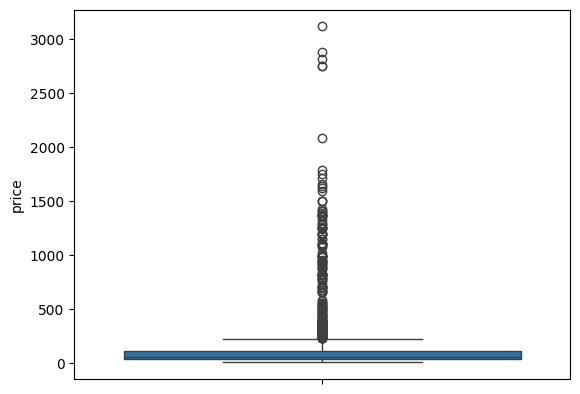

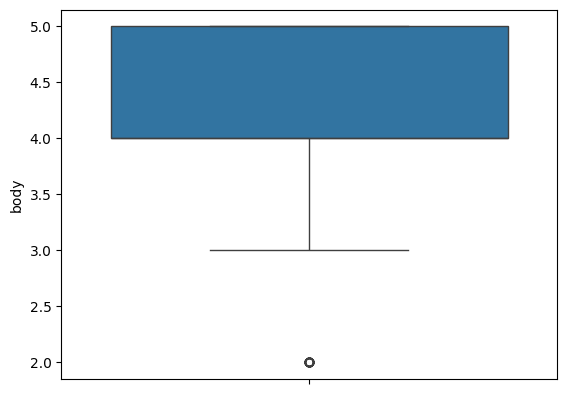

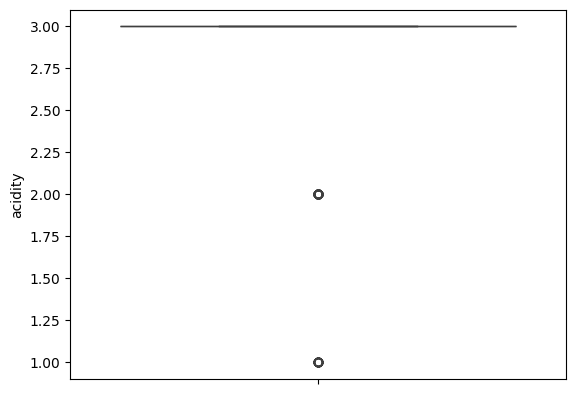

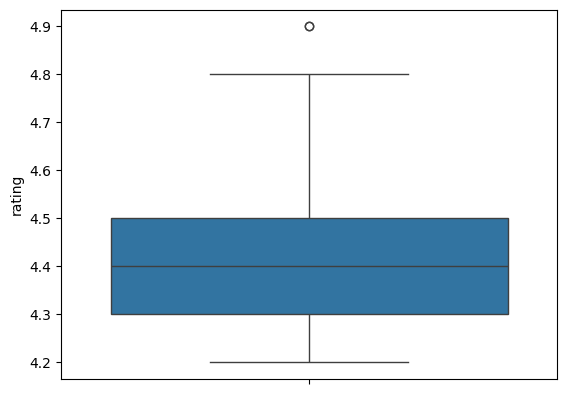

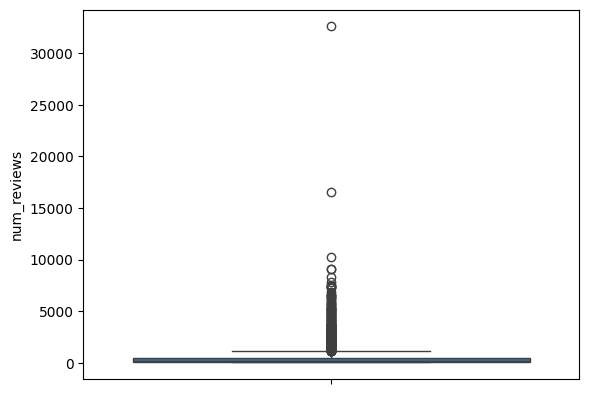

In [ ]:
sns.boxplot(df['price'])
plt.show()
sns.boxplot(df['body'])
plt.show()
sns.boxplot(df['acidity'])
plt.show()
sns.boxplot(df['rating'])
plt.show()
sns.boxplot(df['num_reviews'])
plt.show()

<Axes: ylabel='price'>

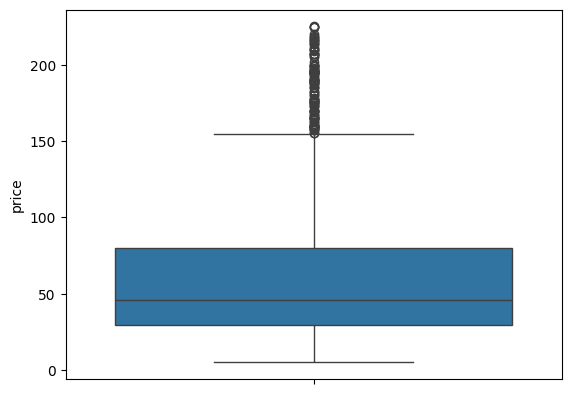

In [ ]:
df1=df.copy()
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df1[(df1['price'] >= lower_bound) & (df1['price'] <= upper_bound)]
sns.boxplot(df2['price'])

<ipython-input-48-2424203878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_price'] = np.log1p(df2['price'])          # log(1 + price)


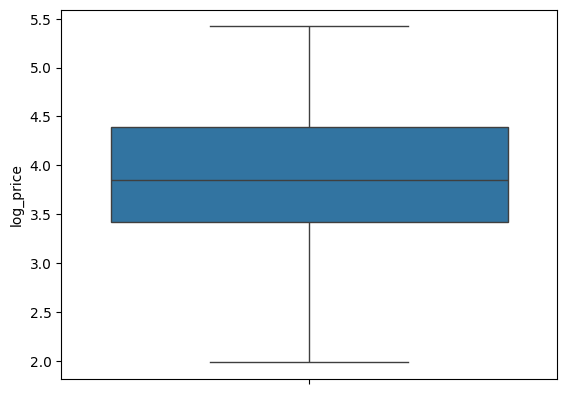

In [ ]:
df2['log_price'] = np.log1p(df2['price'])          # log(1 + price)

Q1 = df2['log_price'].quantile(0.25)
Q3 = df2['log_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df3 = df2[(df2['log_price'] >= lower_bound) & (df2['log_price'] <= upper_bound)]
sns.boxplot(df3['log_price'])
plt.show()

<ipython-input-49-3270997820>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['log_reviews'] = np.log1p(df3['num_reviews'])  # log(1 + reviews)


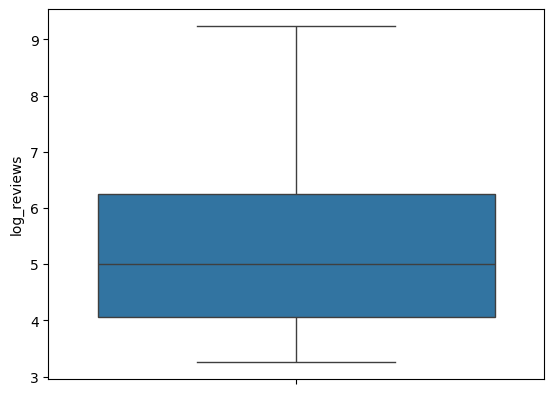

In [ ]:
df3['log_reviews'] = np.log1p(df3['num_reviews'])  # log(1 + reviews)
Q1 = df3['log_reviews'].quantile(0.25)
Q3 = df3['log_reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df3 = df3[(df3['log_reviews'] >= lower_bound) & (df3['log_reviews'] <= upper_bound)]
sns.boxplot(df3['log_reviews'])
plt.show()

#Encoding Relevant Categorical Variables

In [ ]:
df3 = pd.get_dummies(df3, columns=['type'], drop_first=True)
region_counts = df3['region'].value_counts()
rare_regions = region_counts[region_counts < 20].index

df3['region'] = df3['region'].apply(lambda x: 'Other' if x in rare_regions else x)
df3 = pd.get_dummies(df3, columns=['region'], drop_first=True)
df3

,year,rating,num_reviews,price,body,acidity,wine_age,log_price,log_reviews,type_Cabernet Sauvignon,...,region_Montsant,region_Other,region_Penedes,region_Priorato,region_Rias Baixas,region_Ribera del Duero,region_Rioja,region_Sardon de Duero,region_Toro,region_Vino de Espana
11,2016.0,4.8,454,105.15000,5.0,3.0,9.0,4.664853,6.120297,False,...,False,False,False,False,False,True,False,False,False,False
15,2015.0,4.8,372,166.18000,5.0,3.0,10.0,5.119071,5.921578,False,...,False,False,False,False,False,True,False,False,False,False
18,2018.0,4.8,217,195.62738,4.0,3.0,7.0,5.281310,5.384495,False,...,False,False,False,False,False,False,False,False,False,False
44,1985.0,4.8,26,215.34000,4.0,3.0,40.0,5.376851,3.295837,False,...,False,False,False,False,False,False,True,False,False,False
48,2014.0,4.7,4350,175.50000,5.0,3.0,11.0,5.173321,8.378161,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2019.0,4.2,400,27.89000,5.0,3.0,6.0,3.363496,5.993961,False,...,False,False,False,False,False,False,False,False,True,False
2042,2016.0,4.2,398,48.96000,4.0,2.0,9.0,3.911223,5.988961,False,...,False,False,False,False,False,False,False,False,False,True
2047,2011.0,4.2,389,64.50000,5.0,3.0,14.0,4.182050,5.966147,False,...,False,False,False,False,False,True,False,False,False,False
2048,2016.0,4.2,388,31.63000,5.0,3.0,9.0,3.485232,5.963579,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# function to map rating to quality classes
def map_quality(rating):
    if rating >= 4.8:
        return "Outstanding"
    elif rating >= 4.6:
        return "Excellent"
    elif rating >= 4.4:
        return "Good"
    elif rating >= 4.2:
        return "Average"
    else:
        return "Poor"

# Applying this function to create a new column
df3['quality_class'] = df3['rating'].apply(map_quality)
df_copy['quality_class'] = df_copy['rating'].apply(map_quality)

#  Checking how many samples are in each class
print(df3['quality_class'].value_counts())


quality_class
Average        897
Good           712
Excellent      171
Outstanding      4
Name: count, dtype: int64


In [ ]:
quality_mapping = {
    "Poor": 0,
    "Average": 1,
    "Good": 2,
    "Excellent": 3,
    "Outstanding": 4
}
df3['quality_label'] = df3['quality_class'].map(quality_mapping)

#Visualization

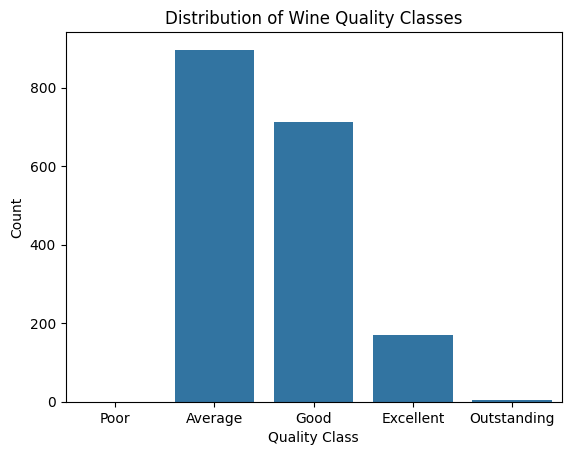

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='quality_class', data=df3, order=["Poor", "Average", "Good", "Excellent", "Outstanding"])
plt.title("Distribution of Wine Quality Classes")
plt.xlabel("Quality Class")
plt.ylabel("Count")
plt.show()

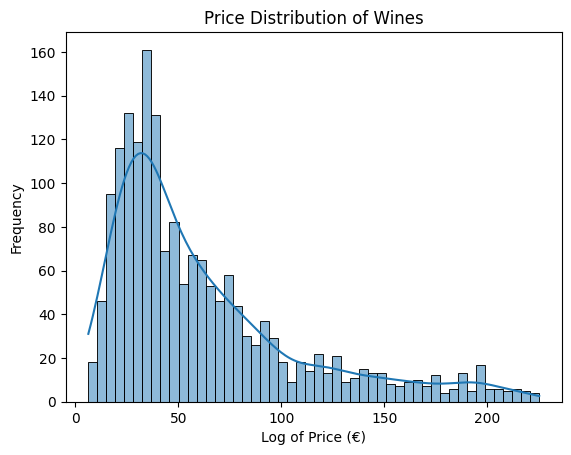

In [ ]:
sns.histplot(df3['price'], kde=True, bins=50)
plt.title("Price Distribution of Wines")
plt.xlabel("Log of Price (€)")
plt.ylabel("Frequency")
plt.show()


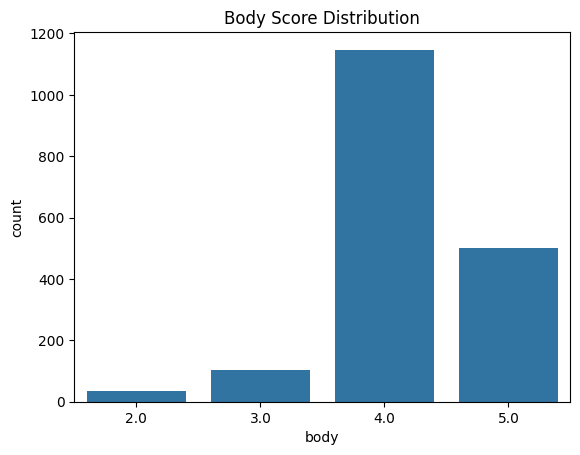

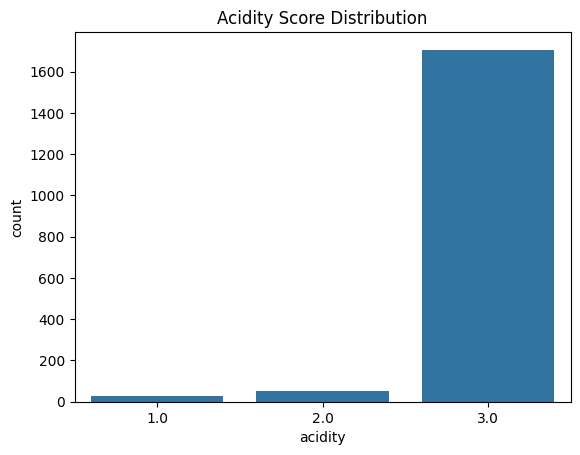

In [ ]:
sns.countplot(x='body', data=df3)
plt.title("Body Score Distribution")
plt.show()
sns.countplot(x='acidity', data=df3)
plt.title("Acidity Score Distribution")
plt.show()

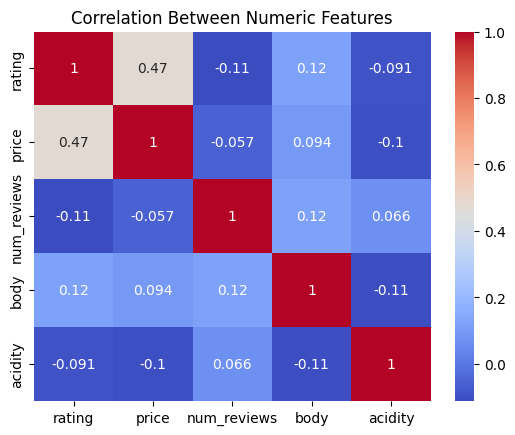

In [ ]:
numeric_cols = ['rating', 'price', 'num_reviews', 'body', 'acidity']
corr = df3[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

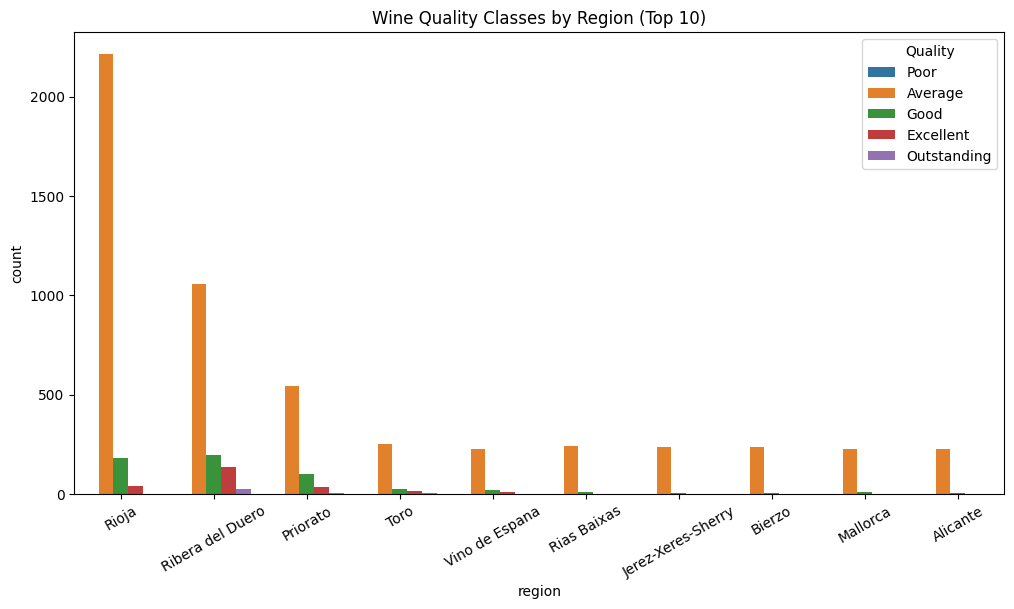

In [ ]:
top_regions = df_copy['region'].value_counts().nlargest(10).index
df_region_top = df_copy[df_copy['region'].isin(top_regions)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_region_top, x='region', hue='quality_class',
              order=top_regions, hue_order=["Poor", "Average", "Good", "Excellent", "Outstanding"])
plt.title("Wine Quality Classes by Region (Top 10)")
plt.xticks(rotation=30)
plt.legend(title="Quality")
plt.show()

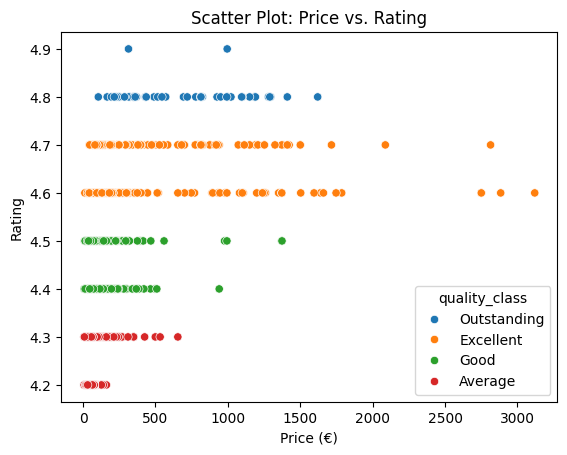

In [ ]:
sns.scatterplot(x='price', y='rating', hue='quality_class',data=df_copy)
plt.title("Scatter Plot: Price vs. Rating")
plt.xlabel("Price (€)")
plt.ylabel("Rating")
plt.show()


#MODELLING

#Baseline model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# X = features, y = labels
# Identify any remaining non-numeric columns that are not target variables
non_numeric_cols = df3.select_dtypes(include='object').columns
# Drop any remaining object columns from the features, ensuring not to drop the target
cols_to_drop_from_X = ['quality_class', 'quality_label'] + list(non_numeric_cols)
X = df3.drop(columns=cols_to_drop_from_X, axis=1, errors='ignore') # drop target and any remaining object columns

y = df3['quality_label']  # encoded labels

# Train-test split (stratified to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Verify X_train contains only numeric columns
print("Data types in X_train before training:")
print(X_train.dtypes)

# Baseline model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions
y_pred = baseline_model.predict(X_test)

# Evaluation
print("\nBaseline Model Performance:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Data types in X_train before training:
year                         float64
rating                       float64
num_reviews                    int64
price                        float64
body                         float64
acidity                      float64
wine_age                     float64
log_price                    float64
log_reviews                  float64
type_Cabernet Sauvignon         bool
type_Cava                       bool
type_Chardonnay                 bool
type_Grenache                   bool
type_Mencia                     bool
type_Monastrell                 bool
type_Montsant Red               bool
type_Pedro Ximenez              bool
type_Priorat Red                bool
type_Red                        bool
type_Ribera Del Duero Red       bool
type_Rioja Red                  bool
type_Rioja White                bool
type_Sauvignon Blanc            bool
type_Sherry                     bool
type_Sparkling                  bool
type_Syrah                      bool

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Tuned Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Model + random search
tuned_model = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=20,  # number of combinations to try
    cv=5,
    scoring='f1_macro',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

tuned_model.fit(X_train, y_train)

# Best model prediction
y_tuned_pred = tuned_model.predict(X_test)

# Evaluation
print("Tuned Model Performance:\n")
print(classification_report(y_test, y_tuned_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_tuned_pred))

# Best parameters
print("Best Hyperparameters:\n", tuned_model.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Tuned Model Performance:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       180
           2       1.00      1.00      1.00       142
           3       0.97      1.00      0.99        34
           4       0.00      0.00      0.00         1

    accuracy                           1.00       357
   macro avg       0.74      0.75      0.75       357
weighted avg       0.99      1.00      1.00       357

Confusion Matrix:
 [[180   0   0   0]
 [  0 142   0   0]
 [  0   0  34   0]
 [  0   0   1   0]]
Best Hyperparameters:
 {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Logistic Regression Baseline Model

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression

# Multinomial setting for multi-class classification
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
print("Logistic Regression:\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       180
           2       1.00      1.00      1.00       142
           3       0.97      0.97      0.97        34
           4       0.00      0.00      0.00         1

    accuracy                           0.99       357
   macro avg       0.74      0.74      0.74       357
weighted avg       0.99      0.99      0.99       357

Confusion Matrix:
 [[180   0   0   0]
 [  0 142   0   0]
 [  0   0  33   1]
 [  0   0   1   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#Decision Tree Classifier Baseline Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
# X = features, y = labels
# Identify any remaining non-numeric columns that are not target variables
non_numeric_cols = df3.select_dtypes(include='object').columns
# Drop any remaining object columns from the features, ensuring not to drop the target
cols_to_drop_from_X = ['quality_class', 'quality_label'] + list(non_numeric_cols)
X = df3.drop(columns=cols_to_drop_from_X, axis=1, errors='ignore') # drop target and any remaining object columns

y = df3['quality_label']  # encoded labels

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Initialize model with default settings
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Classifier:\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       178
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00        28

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Confusion Matrix:
 [[178   0   0]
 [  0 151   0]
 [  0   0  28]]


#Decision Tree Classifier Tuned Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Grid search
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt,
                       cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)

grid_dt.fit(X_train, y_train)

# Predictions
y_pred_dt = grid_dt.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Best Params (Decision Tree):", grid_dt.best_params_)
print("Tuned Decision Tree Performance:\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Params (Decision Tree): {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree Performance:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       178
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00        28

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Confusion Matrix:
 [[178   0   0]
 [  0 151   0]
 [  0   0  28]]


#Logistic Regression Tuned Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'solver': ['lbfgs', 'saga'],            # Good for multinomial
    'multi_class': ['multinomial']
}

# Initialize model
lr = LogisticRegression(max_iter=1000)

# Grid search
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr,
                       cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)

# Don't forget to scale your features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = grid_lr.predict(X_test_scaled)

# Evaluation
print("Best Params (Logistic Regression):", grid_lr.best_params_)
print("Tuned Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Params (Logistic Regression): {'C': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Tuned Logistic Regression Performance:

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       178
           2       0.99      0.98      0.99       151
           3       1.00      0.89      0.94        28
           4       0.00      0.00      0.00         0

    accuracy                           0.98       357
   macro avg       0.75      0.72      0.73       357
weighted avg       0.99      0.98      0.99       357

Confusion Matrix:
 [[178   0   0   0]
 [  2 148   0   1]
 [  0   1  25   2]
 [  0   0   0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricW

#Streamlit

In [1]:
import joblib
from sklearn.preprocessing import StandardScaler # Import StandardScaler again if needed in this cell scope


# Assuming scaler was defined and fitted in a previous cell, it should now be available.
# If running this cell independently, you would need to define scaler first:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # You would also need X_train defined

# Save trained model
joblib.dump(grid_dt, 'model.pkl')

# Optional: save scaler and encoder
# Ensure scaler is defined and fitted before saving
joblib.dump(scaler, 'scaler.pkl')

# If encoder was not used or defined, remove the next line
# If an encoder was defined (e.g., OneHotEncoder), ensure it's defined and fitted before saving
# joblib.dump(encoder, 'encoder.pkl')


NameError: name 'X_train' is not defined

In [ ]:
cylinders = float(input("Enter number of cylinders: "))
displacement = float(input("Enter engine displacement: "))
horsepower = float(input("Enter horsepower: "))
weight = float(input("Enter weight (lbs): "))
acceleration = float(input("Enter acceleration (0-60 time): "))
model_year = float(input("Enter model year (e.g., 82 for 1982): "))

# Step 2: Create DataFrame
new_car = pd.DataFrame({
    "cylinders": [cylinders],
    "displacement": [displacement],
    "horsepower": [horsepower],
    "weight": [weight],
    "acceleration": [acceleration],
    "model year": [model_year]
})

new_car["displacement_on_power"] = new_car["displacement"] / new_car["horsepower"]
new_car["weight_on_cylinder"] = new_car["weight"] / new_car["cylinders"]
new_car["acceleration_on_power"] = new_car["acceleration"] / new_car["horsepower"]
new_car["acceleration_on_cylinder"] = new_car["acceleration"] / new_car["cylinders"]

# Step 3: Predict using the trained model
predicted_mpg = model.predict(new_car)

# Step 4: Display prediction
print(f"Predicted MPG: {predicted_mpg}")